## Sierra-leone Solar Data EDA

Step 1. Import Libraries and Setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

import os

Step 2: Data Loading and Initial Inspection

In [5]:
from pathlib import Path
# Correct path from notebooks/ folder
DATA_FILE = Path('../data/sierraleone-bumbuna.csv')

print(f"Looking for file at:\n  {DATA_FILE.resolve()}")

try:
    sierraleone_df = pd.read_csv(DATA_FILE)
    print("Data loaded successfully!")
    print(f"Dataset shape: {sierraleone_df.shape}")
except FileNotFoundError:
    print("File not found! Check path and filename.")
    sierraleone_df = pd.DataFrame()

# Display
print("\nDataset Info:")
print(sierraleone_df.info())

print("\nFirst 5 rows:")
display(sierraleone_df.head())

print("\nBasic Statistics:")
display(sierraleone_df.describe())

Looking for file at:
  C:\Users\hello\Desktop\solar-dataChallenge-week0\data\sierraleone-bumbuna.csv
Data loaded successfully!
Dataset shape: (525600, 19)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN



Basic Statistics:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


Step 3: Data Quality Assessment(Checking Missing values)


In [6]:
# Missing values analysis
print("🔍 Missing Values Analysis:")
missing_data = sierraleone_df.isnull().sum()
missing_percent = (missing_data / len(sierraleone_df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Percentage', ascending=False)

print("Columns with missing values:")
display(missing_df)

# Identify columns with >5% missing values
high_missing = missing_df[missing_df['Missing Percentage'] > 5]
print(f"\n🚨 Columns with >5% missing values: {len(high_missing)}")
display(high_missing)

🔍 Missing Values Analysis:
Columns with missing values:


,Missing Count,Missing Percentage
Comments,525600,100.0



🚨 Columns with >5% missing values: 1


,Missing Count,Missing Percentage
Comments,525600,100.0


Data Quality Assessment - Critical Findings

In [7]:

print("🚨 CRITICAL DATA QUALITY ISSUES IDENTIFIED")
print("="*50)

# Check for negative values in solar radiation metrics
negative_issues = {}
solar_metrics = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']

for metric in solar_metrics:
    negative_count = (sierraleone_df[metric] < 0).sum()
    negative_percentage = (negative_count / len(sierraleone_df)) * 100
    negative_issues[metric] = {
        'negative_count': negative_count,
        'negative_percentage': negative_percentage,
        'min_value': sierraleone_df[metric].min(),
        'max_value': sierraleone_df[metric].max()
    }

print("📉 Negative Values in Solar Metrics:")
for metric, issues in negative_issues.items():
    print(f"  • {metric}: {issues['negative_count']:,} negative values ({issues['negative_percentage']:.2f}%)")
    print(f"    Range: [{issues['min_value']:.1f}, {issues['max_value']:.1f}]")

# Check for zero values during daytime hours
sierraleone_df['Timestamp'] = pd.to_datetime(sierraleone_df['Timestamp'])
sierraleone_df['hour'] = sierraleone_df['Timestamp'].dt.hour
daytime_mask = (sierraleone_df['hour'] >= 6) & (sierraleone_df['hour'] <= 18)

print(f"\n🌞 Daytime Data Analysis (6 AM - 6 PM):")
for metric in solar_metrics:
    daytime_zeros = ((sierraleone_df[metric] == 0) & daytime_mask).sum()
    daytime_total = daytime_mask.sum()
    zero_percentage = (daytime_zeros / daytime_total) * 100
    print(f"  • {metric}: {daytime_zeros:,} zero values during daytime ({zero_percentage:.2f}%)")


🚨 CRITICAL DATA QUALITY ISSUES IDENTIFIED
📉 Negative Values in Solar Metrics:
  • GHI: 261,135 negative values (49.68%)
    Range: [-19.5, 1499.0]
  • DNI: 266,352 negative values (50.68%)
    Range: [-7.8, 946.0]
  • DHI: 263,128 negative values (50.06%)
    Range: [-17.9, 892.0]
  • ModA: 0 negative values (0.00%)
    Range: [0.0, 1507.0]
  • ModB: 0 negative values (0.00%)
    Range: [0.0, 1473.0]

🌞 Daytime Data Analysis (6 AM - 6 PM):
  • GHI: 252 zero values during daytime (0.09%)
  • DNI: 9,909 zero values during daytime (3.48%)
  • DHI: 206 zero values during daytime (0.07%)
  • ModA: 10,543 zero values during daytime (3.70%)
  • ModB: 10,790 zero values during daytime (3.79%)


4. Advanced Data Cleaning Strategy


In [8]:
# Create cleaning copy
sierraleone_clean = sierraleone_df.copy()

# Define solar metrics (from earlier context)
solar_metrics = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']

# Define daytime mask (6 AM to 6 PM)
daytime_mask = sierraleone_clean['Timestamp'].dt.hour.between(6, 18)

# ------------------------------------------------------------------
# 1. Handle Negative Solar Values → set to 0
# ------------------------------------------------------------------
print("Handling Negative Solar Values:")
for metric in solar_metrics:
    negative_mask = sierraleone_clean[metric] < 0  # Fixed: was [metric] < 0
    negative_count = negative_mask.sum()
    if negative_count > 0:
        sierraleone_clean.loc[negative_mask, metric] = 0
        print(f"  • {metric}: Replaced {negative_count:,} negative values with 0")

# ------------------------------------------------------------------
# 2. Handle Missing Values → Impute with Median
# ------------------------------------------------------------------
print("\nHandling Missing Values (Imputing with Median):")
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
for col in key_columns:
    if sierraleone_clean[col].isna().any():
        median_val = sierraleone_clean[col].median()
        missing_count = sierraleone_clean[col].isna().sum()
        sierraleone_clean[col] = sierraleone_clean[col].fillna(median_val)
        print(f"  • {col}: Imputed {missing_count:,} missing values with median ({median_val:.2f})")


# 3 Outlier Detection using Z-Score (|Z| > 3) → Flag
print("\nOutlier Detection using Z-Score (|Z| > 3):")
outlier_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
for col in outlier_columns:
    # Compute Z-score (skip NaN)
    z_scores = np.abs(stats.zscore(sierraleone_clean[col].dropna()))
    # Reindex to match original
    full_z = np.full(len(sierraleone_clean), np.nan)
    full_z[sierraleone_clean[col].notna()] = z_scores
    outlier_mask = np.abs(full_z) > 3
    outlier_count = outlier_mask.sum()
    outlier_pct = 100 * outlier_count / len(sierraleone_clean)
    
    sierraleone_clean[f'{col}_outlier'] = outlier_mask
    print(f"  • {col}: {outlier_count:,} outliers ({outlier_pct:.2f}%) → flagged as {col}_outlier")

# 5. Drop Comments column
if 'Comments' in sierraleone_clean.columns:
    sierraleone_clean = sierraleone_clean.drop('Comments', axis=1)
    print(f"\nRemoved 'Comments' column (100% empty)")

Handling Negative Solar Values:
  • GHI: Replaced 261,135 negative values with 0
  • DNI: Replaced 266,352 negative values with 0
  • DHI: Replaced 263,128 negative values with 0

Handling Missing Values (Imputing with Median):

Outlier Detection using Z-Score (|Z| > 3):
  • GHI: 2,574 outliers (0.49%) → flagged as GHI_outlier
  • DNI: 7,594 outliers (1.44%) → flagged as DNI_outlier
  • DHI: 3,202 outliers (0.61%) → flagged as DHI_outlier
  • ModA: 1,604 outliers (0.31%) → flagged as ModA_outlier
  • ModB: 2,041 outliers (0.39%) → flagged as ModB_outlier
  • WS: 3,967 outliers (0.75%) → flagged as WS_outlier
  • WSgust: 3,665 outliers (0.70%) → flagged as WSgust_outlier

Removed 'Comments' column (100% empty)


In [9]:
print("✅ DATA VALIDATION SUMMARY")
print("="*35)

original_rows = len(sierraleone_df)
cleaned_rows = len(sierraleone_clean)
negative_corrections = sum([v['negative_count'] for v in negative_issues.values()])

print(f"  • Original dataset: {original_rows:,} rows")
print(f"  • After cleaning: {cleaned_rows:,} rows")
print(f"  • Negative values corrected: {negative_corrections:,}")
print(f"  • Columns removed: 1 (Comments)")
print(f"  • Outlier flags added: {len(outlier_columns)}")

✅ DATA VALIDATION SUMMARY
  • Original dataset: 525,600 rows
  • After cleaning: 525,600 rows
  • Negative values corrected: 790,615
  • Columns removed: 1 (Comments)
  • Outlier flags added: 7


In [10]:
sierraleone_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Timestamp       525600 non-null  datetime64[ns]
 1   GHI             525600 non-null  float64       
 2   DNI             525600 non-null  float64       
 3   DHI             525600 non-null  float64       
 4   ModA            525600 non-null  float64       
 5   ModB            525600 non-null  float64       
 6   Tamb            525600 non-null  float64       
 7   RH              525600 non-null  float64       
 8   WS              525600 non-null  float64       
 9   WSgust          525600 non-null  float64       
 10  WSstdev         525600 non-null  float64       
 11  WD              525600 non-null  float64       
 12  WDstdev         525600 non-null  float64       
 13  BP              525600 non-null  int64         
 14  Cleaning        525600 non-null  int

5. Time Series Analysis

ENHANCED TIME SERIES ANALYSIS

Monthly Statistics:


GHI                   Tamb                 RH
         mean     max     std   mean   max   min   mean
month                                                  
1      202.68  1206.0  284.16  25.33  39.5  12.3  63.43
2      225.36  1012.0  306.09  27.19  39.6  16.3  61.37
3      235.94  1186.0  320.90  28.36  39.9  18.7  62.52
4      240.76  1219.0  329.38  28.75  38.4  19.1  66.63
5      204.63  1347.0  301.05  27.28  37.6  21.0  83.19
6      200.74  1299.0  297.87  25.96  33.8  20.5  88.05
7      170.38  1445.0  260.24  25.11  31.7  20.8  91.20
8      156.24  1463.0  246.85  24.73  31.8  20.4  93.89
9      194.07  1499.0  291.20  25.40  33.3  21.0  90.87
10     206.65  1415.0  308.01  25.49  35.3  20.6  90.11
11     219.38  1232.0  314.53  26.49  36.3  20.3  86.26
12     199.30  1004.0  281.86  25.88  37.8  15.2  74.54

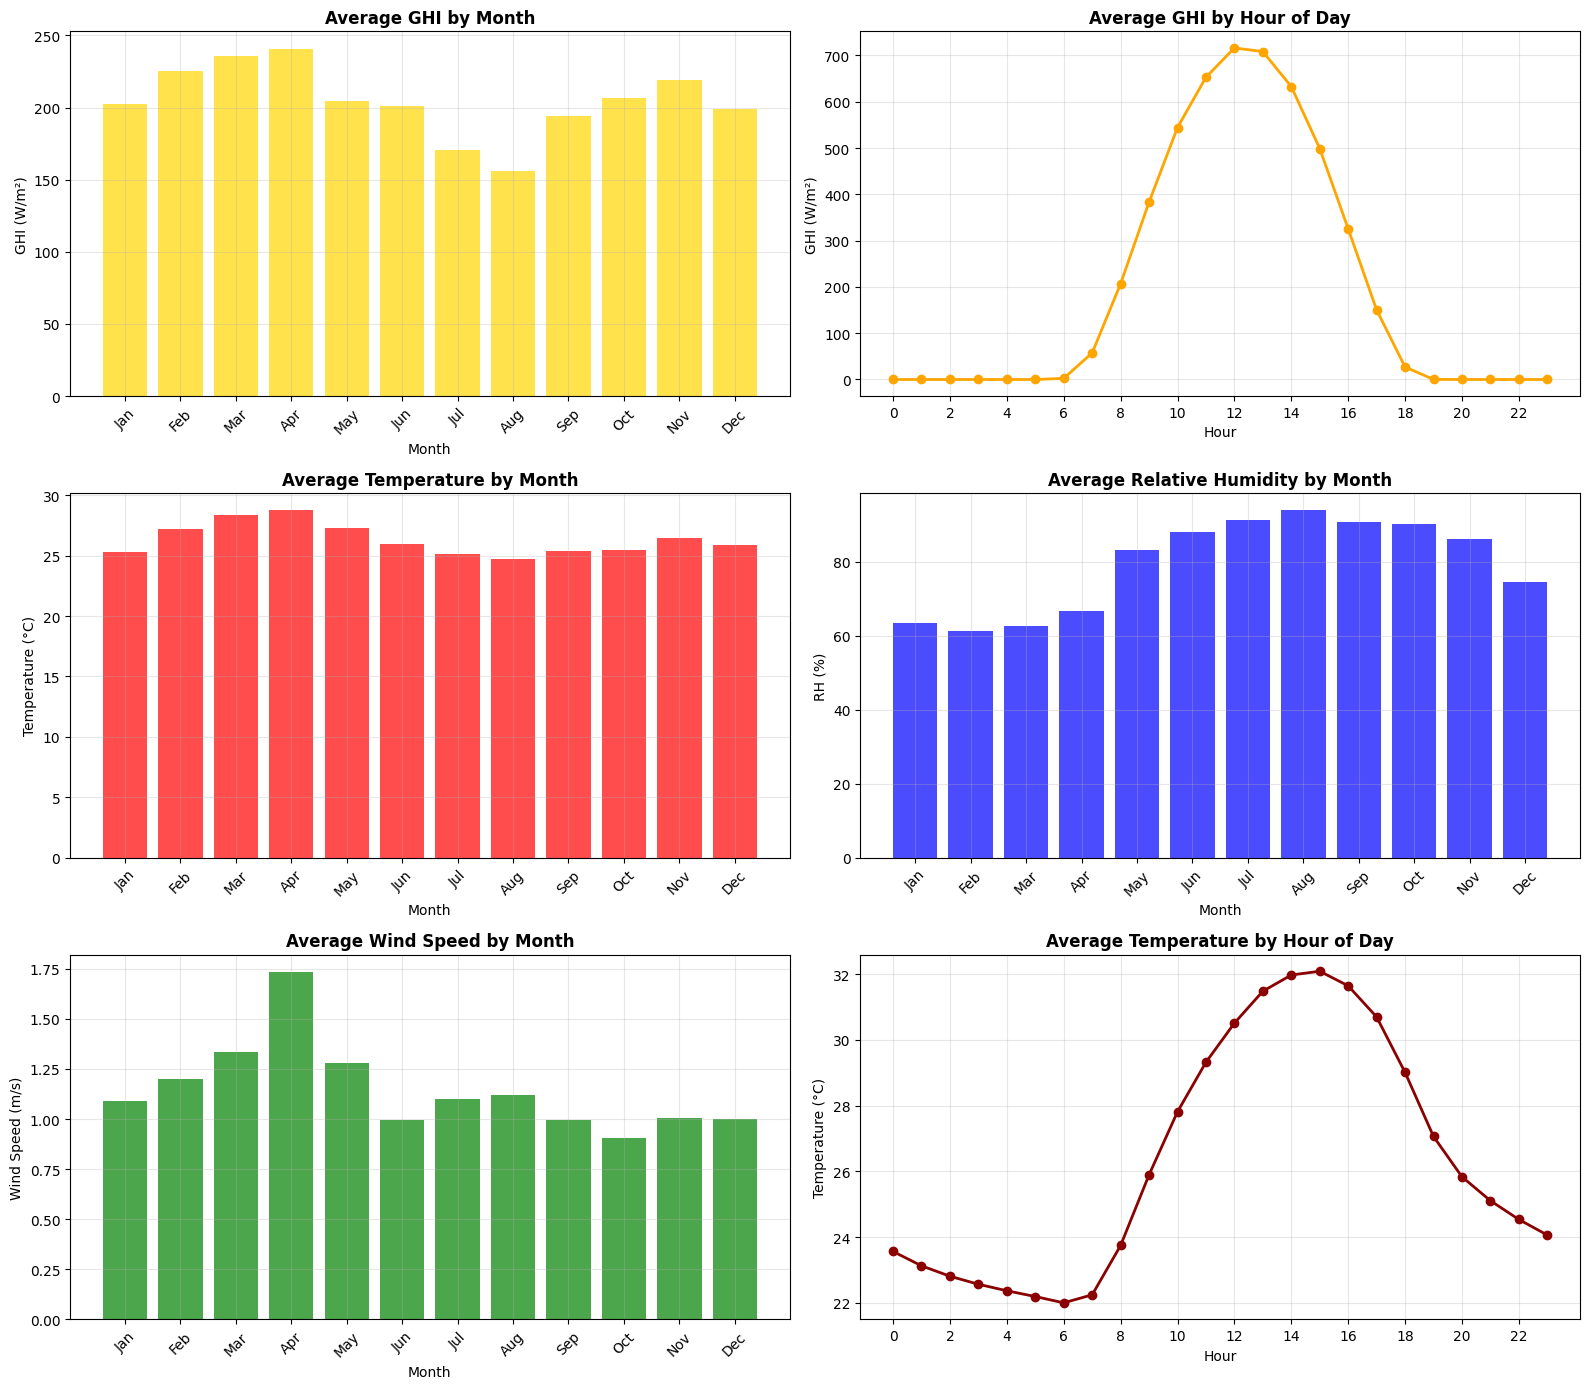

In [11]:

# Set timestamp as index AND extract month/hour from Timestamp
benin_ts = sierraleone_clean.copy()
benin_ts['Timestamp'] = pd.to_datetime(benin_ts['Timestamp'])  # Ensure datetime
benin_ts = benin_ts.set_index('Timestamp')

# Extract month and hour from the index
benin_ts['month'] = benin_ts.index.month  # type: ignore
benin_ts['hour'] = benin_ts.index.hour    # type: ignore

print("ENHANCED TIME SERIES ANALYSIS")
print("="*45)

# Analyze data distribution by month and hour
monthly_stats = benin_ts.groupby('month').agg({
    'GHI': ['mean', 'max', 'std'],
    'Tamb': ['mean', 'max', 'min'],
    'RH': 'mean'
}).round(2)

print("\nMonthly Statistics:")
display(monthly_stats)

# Create enhanced time series visualization
fig, axes = plt.subplots(3, 2, figsize=(16, 14))

# 1. GHI Distribution by Month
monthly_ghi = benin_ts.groupby('month')['GHI'].mean()
axes[0,0].bar(monthly_ghi.index, monthly_ghi.values, color='gold', alpha=0.7)
axes[0,0].set_title('Average GHI by Month', fontweight='bold', fontsize=12)
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('GHI (W/m²)')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_xticks(range(1, 13))
axes[0,0].set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=45)

# 2. Daily Pattern - GHI
hourly_ghi = benin_ts.groupby('hour')['GHI'].mean()
axes[0,1].plot(hourly_ghi.index, hourly_ghi.values, marker='o', linewidth=2, color='orange')
axes[0,1].set_title('Average GHI by Hour of Day', fontweight='bold', fontsize=12)
axes[0,1].set_xlabel('Hour')
axes[0,1].set_ylabel('GHI (W/m²)')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_xticks(range(0, 24, 2))

# 3. Temperature by Month
monthly_temp = benin_ts.groupby('month')['Tamb'].mean()
axes[1,0].bar(monthly_temp.index, monthly_temp.values, color='red', alpha=0.7)
axes[1,0].set_title('Average Temperature by Month', fontweight='bold', fontsize=12)
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Temperature (°C)')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].set_xticks(range(1, 13))
axes[1,0].set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=45)

# 4. RH by Month
monthly_rh = benin_ts.groupby('month')['RH'].mean()
axes[1,1].bar(monthly_rh.index, monthly_rh.values, color='blue', alpha=0.7)
axes[1,1].set_title('Average Relative Humidity by Month', fontweight='bold', fontsize=12)
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('RH (%)')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].set_xticks(range(1, 13))
axes[1,1].set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=45)

# 5. Wind Speed by Month
monthly_ws = benin_ts.groupby('month')['WS'].mean()
axes[2,0].bar(monthly_ws.index, monthly_ws.values, color='green', alpha=0.7)
axes[2,0].set_title('Average Wind Speed by Month', fontweight='bold', fontsize=12)
axes[2,0].set_xlabel('Month')
axes[2,0].set_ylabel('Wind Speed (m/s)')
axes[2,0].grid(True, alpha=0.3)
axes[2,0].set_xticks(range(1, 13))
axes[2,0].set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=45)

# 6. Daily Temperature Pattern
hourly_temp = benin_ts.groupby('hour')['Tamb'].mean()
axes[2,1].plot(hourly_temp.index, hourly_temp.values, marker='o', linewidth=2, color='darkred')
axes[2,1].set_title('Average Temperature by Hour of Day', fontweight='bold', fontsize=12)
axes[2,1].set_xlabel('Hour')
axes[2,1].set_ylabel('Temperature (°C)')
axes[2,1].grid(True, alpha=0.3)
axes[2,1].set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.show()

6. Correlation Analysis

 CORRELATION ANALYSIS


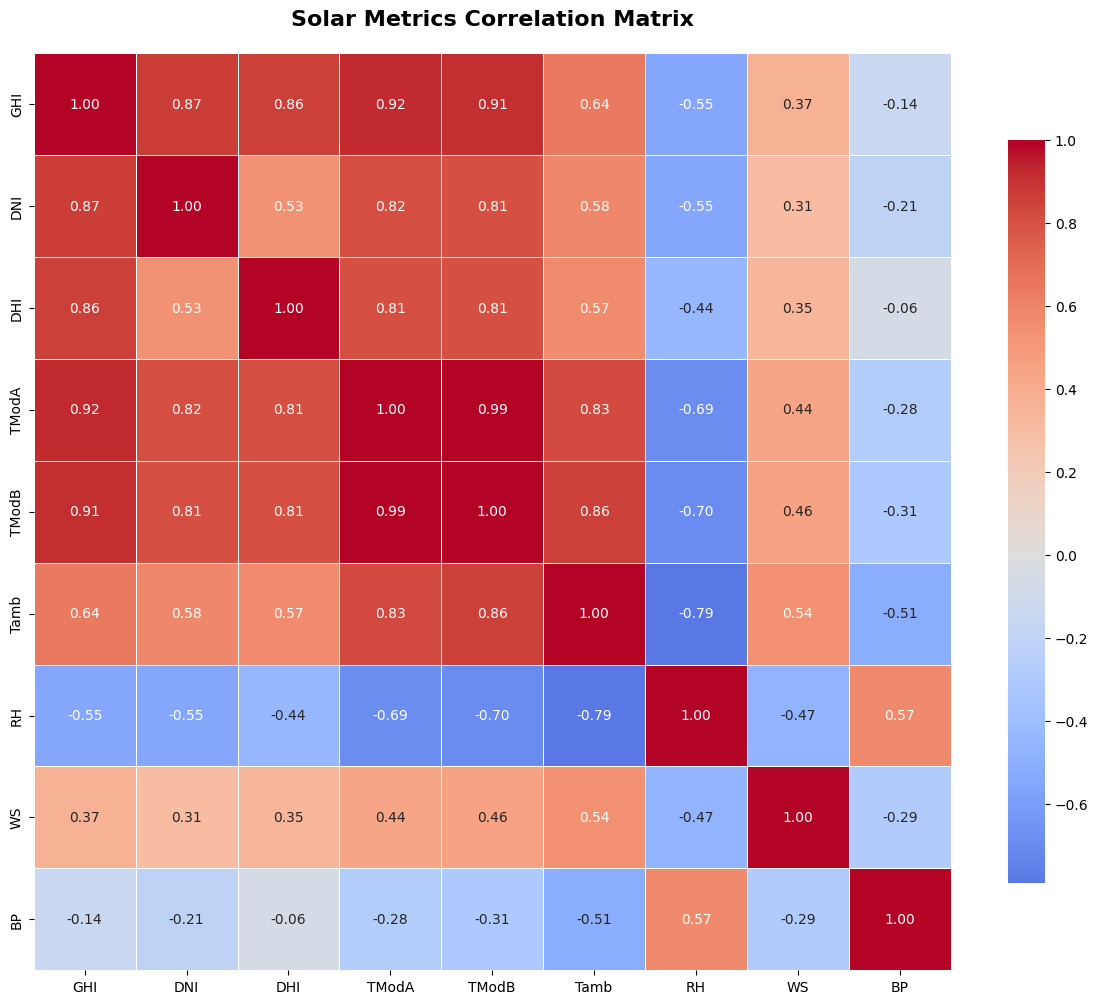


📊 Highly Correlated Variable Pairs (|r| > 0.8):
  • GHI vs DNI: r = 0.870
  • GHI vs DHI: r = 0.864
  • GHI vs TModA: r = 0.922
  • GHI vs TModB: r = 0.911
  • DNI vs TModA: r = 0.816
  • DNI vs TModB: r = 0.808
  • DHI vs TModA: r = 0.806
  • DHI vs TModB: r = 0.805
  • TModA vs TModB: r = 0.993
  • TModA vs Tamb: r = 0.832
  • TModB vs Tamb: r = 0.855


In [12]:

print(" CORRELATION ANALYSIS")
print("="*40)

# Create comprehensive correlation matrix
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb', 'RH', 'WS', 'BP']
corr_matrix = sierraleone_clean[corr_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f",
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Solar Metrics Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identify highly correlated pairs
print("\n📊 Highly Correlated Variable Pairs (|r| > 0.8):")
high_corr_pairs = []
for i in range(len(corr_columns)):
    for j in range(i+1, len(corr_columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8: 
            high_corr_pairs.append((corr_columns[i], corr_columns[j], corr_matrix.iloc[i, j]))

for var1, var2, corr in high_corr_pairs:
    print(f"  • {var1} vs {var2}: r = {corr:.3f}")

6. Cleaning Impact Analysis


🧽 CLEANING IMPACT ANALYSIS
Cleaning events distribution:
  • Before cleaning: 525,092 records (99.90%)
  • After cleaning: 508 records (0.10%)


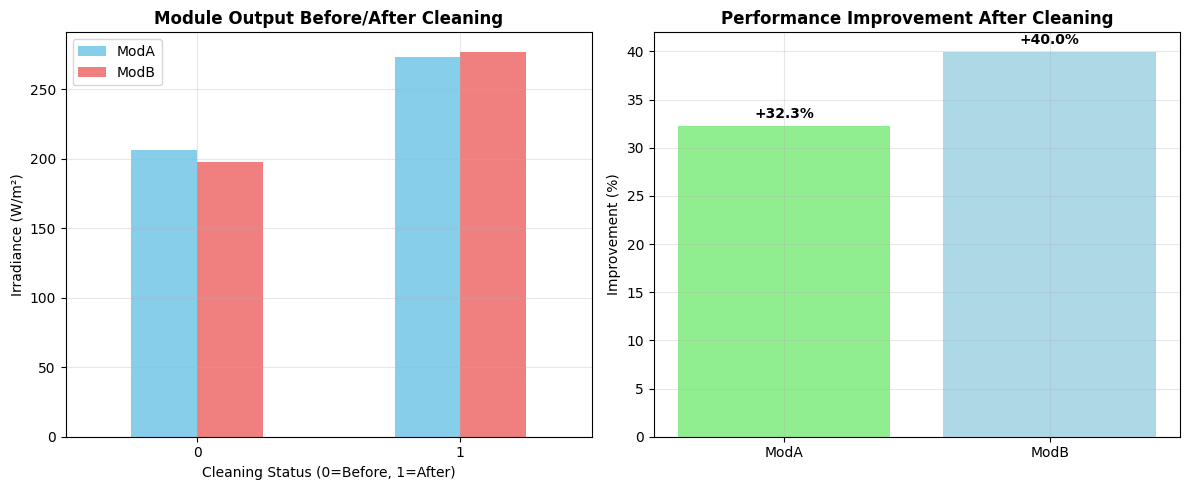


📊 Statistical Significance Test:
  • ModA t-test p-value: 0.000000
  • Result: Significant difference


In [13]:

print("🧽 CLEANING IMPACT ANALYSIS")
print("="*35)

if 'Cleaning' in sierraleone_clean.columns:
    # Calculate cleaning statistics
    cleaning_counts = sierraleone_clean['Cleaning'].value_counts().sort_index()
    print(f"Cleaning events distribution:")
    for cleaning_status, count in cleaning_counts.items():
        status = "After cleaning" if cleaning_status == 1 else "Before cleaning"
        print(f"  • {status}: {count:,} records ({count/len(sierraleone_clean)*100:.2f}%)")
    
    # Enhanced cleaning impact visualization
    plt.figure(figsize=(12, 5))
    
    # Plot 1: Bar chart of average module outputs
    plt.subplot(1, 2, 1)
    cleaning_impact = sierraleone_clean.groupby('Cleaning')[['ModA', 'ModB']].mean()
    cleaning_impact.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'lightcoral'])
    plt.title('Module Output Before/After Cleaning', fontweight='bold')
    plt.ylabel('Irradiance (W/m²)')
    plt.xlabel('Cleaning Status (0=Before, 1=After)')
    plt.xticks(rotation=0)
    plt.legend(['ModA', 'ModB'])
    plt.grid(True, alpha=0.3)
    
    # Plot 2: Percentage improvement
    plt.subplot(1, 2, 2)
    if len(cleaning_impact) > 1:
        improvements = [
            ((cleaning_impact.loc[1, 'ModA'] - cleaning_impact.loc[0, 'ModA']) / cleaning_impact.loc[0, 'ModA']) * 100,
            ((cleaning_impact.loc[1, 'ModB'] - cleaning_impact.loc[0, 'ModB']) / cleaning_impact.loc[0, 'ModB']) * 100
        ]
        modules = ['ModA', 'ModB']
        bars = plt.bar(modules, improvements, color=['lightgreen', 'lightblue'])
        plt.title('Performance Improvement After Cleaning', fontweight='bold')
        plt.ylabel('Improvement (%)')
        
        # Add value labels on bars
        for bar, improvement in zip(bars, improvements):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                    f'{improvement:+.1f}%', ha='center', va='bottom', fontweight='bold')
        
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Statistical significance test
    if len(cleaning_impact) > 1:
        from scipy.stats import ttest_ind
        moda_before = sierraleone_clean[sierraleone_clean['Cleaning'] == 0]['ModA']
        moda_after = sierraleone_clean[sierraleone_clean['Cleaning'] == 1]['ModA']
        
        t_stat, p_value = ttest_ind(moda_before, moda_after, equal_var=False)
        print(f"\n📊 Statistical Significance Test:")
        print(f"  • ModA t-test p-value: {p_value:.6f}")
        print(f"  • Result: {'Significant difference' if p_value < 0.05 else 'No significant difference'}")



7. Feature Selection & Multicollinearity Handling

FEATURE SELECTION & MULTICOLLINEARITY HANDLING
Dropped redundant features to handle multicollinearity:
  • Removed: TModA
  • Removed: TModB
  • Removed: ModA
  • Removed: ModB

Remaining columns: 22
Features: ['Timestamp', 'GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'hour', 'GHI_outlier', 'DNI_outlier', 'DHI_outlier', 'ModA_outlier', 'ModB_outlier', 'WS_outlier', 'WSgust_outlier']


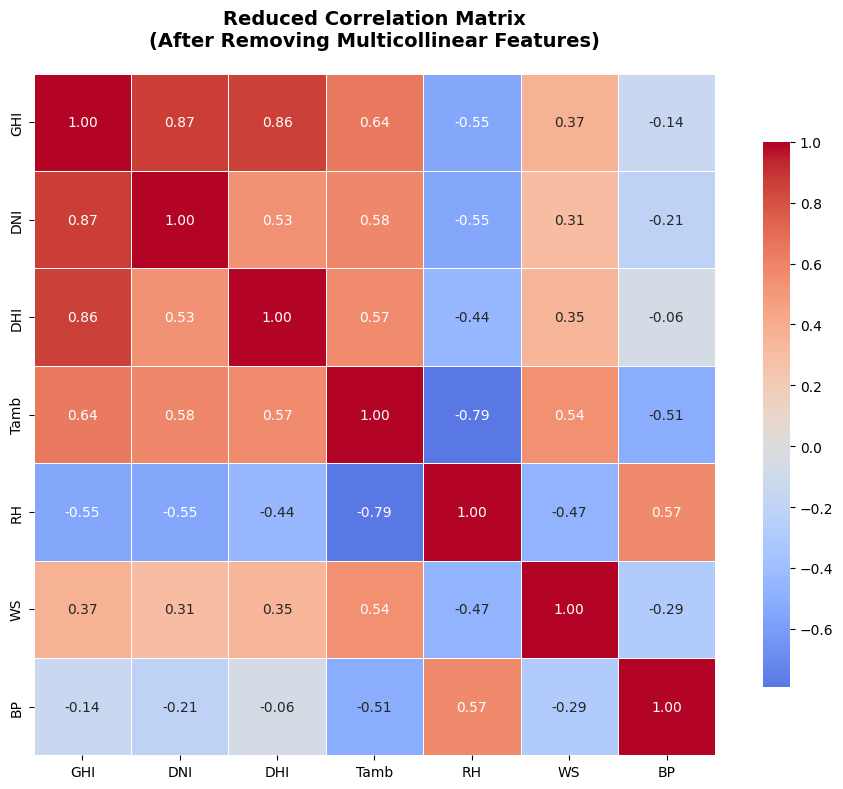

In [14]:

print("FEATURE SELECTION & MULTICOLLINEARITY HANDLING")
print("="*50)

# Create copy for feature selection
sierraleone_features = sierraleone_clean.copy()

# Drop redundant features to avoid multicollinearity
columns_to_drop = ['TModA', 'TModB', 'ModA', 'ModB']
sierraleone_features = sierraleone_features.drop(columns=[col for col in columns_to_drop if col in sierraleone_features.columns])

print("Dropped redundant features to handle multicollinearity:")
for col in columns_to_drop:
    if col in sierraleone_clean.columns:
        print(f"  • Removed: {col}")

print(f"\nRemaining columns: {len(sierraleone_features.columns)}")
print("Features:", sierraleone_features.columns.tolist())

# Verify correlation reduction
remaining_corr_cols = [col for col in corr_columns if col in sierraleone_features.columns]
reduced_corr_matrix = sierraleone_features[remaining_corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(reduced_corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f",
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Reduced Correlation Matrix\n(After Removing Multicollinear Features)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [15]:
sierraleone_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Timestamp       525600 non-null  datetime64[ns]
 1   GHI             525600 non-null  float64       
 2   DNI             525600 non-null  float64       
 3   DHI             525600 non-null  float64       
 4   Tamb            525600 non-null  float64       
 5   RH              525600 non-null  float64       
 6   WS              525600 non-null  float64       
 7   WSgust          525600 non-null  float64       
 8   WSstdev         525600 non-null  float64       
 9   WD              525600 non-null  float64       
 10  WDstdev         525600 non-null  float64       
 11  BP              525600 non-null  int64         
 12  Cleaning        525600 non-null  int64         
 13  Precipitation   525600 non-null  float64       
 14  hour            525600 non-null  int

8. Scatter Plot Analysis

📊 SCATTER PLOT ANALYSIS


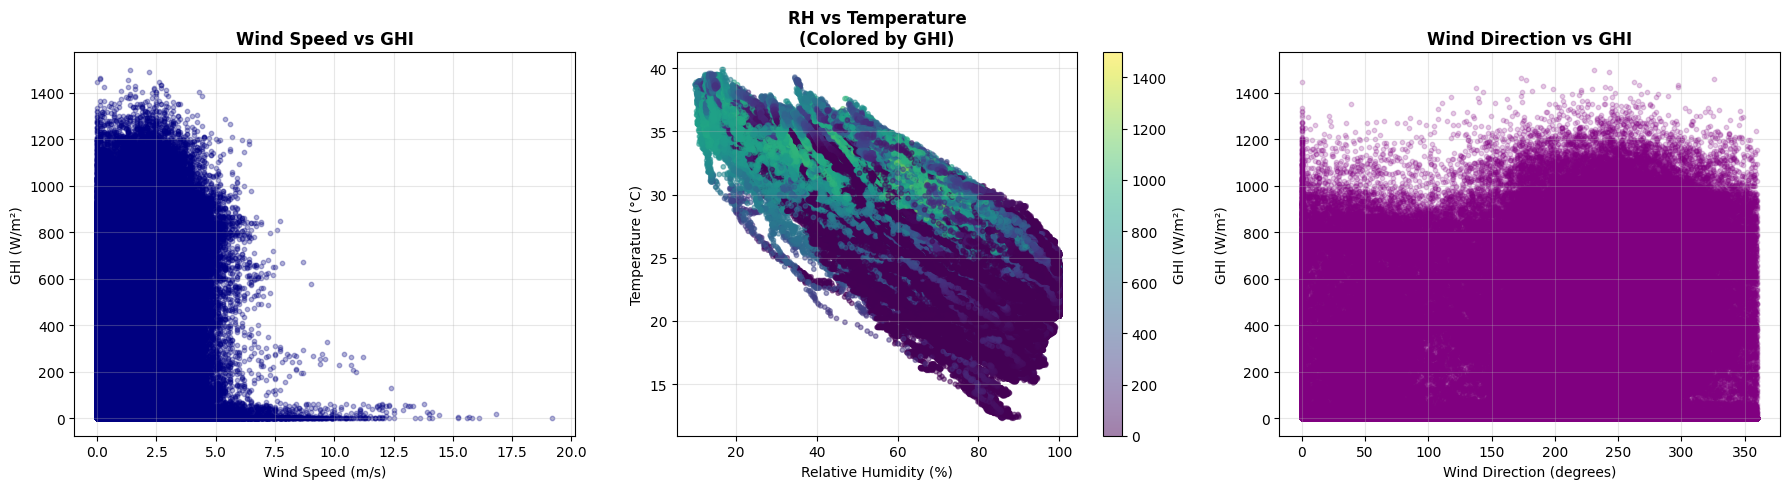

In [16]:

print("📊 SCATTER PLOT ANALYSIS")
print("="*45)

plt.figure(figsize=(18, 5))

# Plot 1: Wind Speed vs GHI
plt.subplot(1, 3, 1)
scatter1 = plt.scatter(sierraleone_features['WS'], sierraleone_features['GHI'], 
                      alpha=0.3, color='navy', s=10)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('GHI (W/m²)')
plt.title('Wind Speed vs GHI', fontweight='bold')
plt.grid(True, alpha=0.3)

# Plot 2: RH vs Temperature (colored by GHI)
plt.subplot(1, 3, 2)
scatter2 = plt.scatter(sierraleone_features['RH'], sierraleone_features['Tamb'], 
                      c=sierraleone_features['GHI'], cmap='viridis', alpha=0.5, s=10)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.title('RH vs Temperature\n(Colored by GHI)', fontweight='bold')
plt.colorbar(scatter2, label='GHI (W/m²)')
plt.grid(True, alpha=0.3)

# Plot 3: Wind Direction vs GHI
plt.subplot(1, 3, 3)
scatter3 = plt.scatter(sierraleone_features['WD'], sierraleone_features['GHI'], 
                      alpha=0.2, color='purple', s=10)
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('GHI (W/m²)')
plt.title('Wind Direction vs GHI', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Bubble Chart Analysis

Simple Bubble Chart: GHI vs Temperature


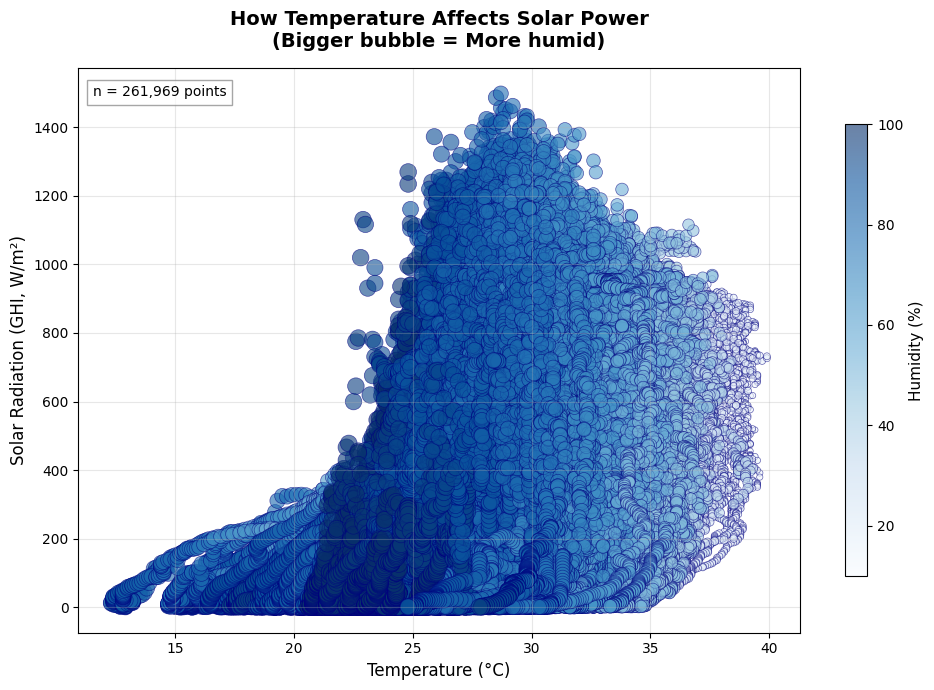

In [17]:

print("Simple Bubble Chart: GHI vs Temperature")
print("="*50)

plt.figure(figsize=(10, 7))

# Use only daytime data with positive GHI
daytime = sierraleone_features[
    (sierraleone_features['Timestamp'].dt.hour >= 6) & 
    (sierraleone_features['Timestamp'].dt.hour <= 18) & 
    (sierraleone_features['GHI'] > 0)
]

# Simple scatter with bubble size = humidity
plt.scatter(
    daytime['Tamb'],      # X: Temperature
    daytime['GHI'],       # Y: Solar Radiation
    s=daytime['RH'] * 1.5,  # Bubble size = Humidity (scaled)
    c=daytime['RH'],      # Color = Humidity
    cmap='Blues',         # Soft blue gradient
    alpha=0.6,
    edgecolor='navy',
    linewidth=0.5
)

# Labels & Title
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Solar Radiation (GHI, W/m²)', fontsize=12)
plt.title('How Temperature Affects Solar Power\n(Bigger bubble = More humid)', 
          fontsize=14, fontweight='bold', pad=15)

# Colorbar
cbar = plt.colorbar(label='Humidity (%)', shrink=0.8)
cbar.set_label('Humidity (%)', fontsize=11)

# Grid
plt.grid(True, alpha=0.3)

# Show count
plt.text(0.02, 0.95, f'n = {len(daytime):,} points', 
         transform=plt.gca().transAxes, fontsize=10,
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

plt.tight_layout()
plt.show()

## 11. Final Data Export

In [19]:

# Remove outlier flags and temporary columns for final export
columns_to_drop = [col for col in sierraleone_features.columns if any(x in col for x in ['_outlier', '_suspicious_zero', 'hour'])]
sierraleone_final = sierraleone_features.drop(columns=columns_to_drop)

output_dir  = Path('../data')          
output_path = output_dir / 'sierra_leone_clean.csv'

output_dir.mkdir(parents=True, exist_ok=True)

# Export cleaned data
sierraleone_final.to_csv(output_path, index=False)
print(f"Cleaned data exported to: {output_path.resolve()}")

print(f"📊 Final dataset shape: {sierraleone_final.shape}")
print(f"🗂️  Columns in final dataset: {len(sierraleone_final.columns)}")
print("\n📋 Final feature set:")
for i, col in enumerate(sierraleone_final.columns, 1):
    print(f"  {i:2d}. {col}")

Cleaned data exported to: C:\Users\hello\Desktop\solar-dataChallenge-week0\data\sierra_leone_clean.csv
📊 Final dataset shape: (525600, 14)
🗂️  Columns in final dataset: 14

📋 Final feature set:
   1. Timestamp
   2. GHI
   3. DNI
   4. DHI
   5. Tamb
   6. RH
   7. WS
   8. WSgust
   9. WSstdev
  10. WD
  11. WDstdev
  12. BP
  13. Cleaning
  14. Precipitation
